# Notebook to compare and rank options 

Made this notebook to compare various options from the architects list but same can be used to comapre design options as well.
If you are using it from the binder link which I made then you wont be needing to install anything really.
But if you want to use it on your own system then these are the dependiencies [ jupyter, scikit criteira , ipywidgets ]

The comparison method choosen here is TOPSIS but other can also be choosen according to the problem [https://scikit-criteria.quatrope.org/en/latest/tutorial/quickstart.html]

In [7]:
import skcriteria as skc
import ipywidgets as widgets
from skcriteria.madm import similarity  # here lives TOPSIS
from skcriteria.pipeline import mkpipe  # this function is for create pipelines
from skcriteria.preprocessing import invert_objectives, scalers
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mtplt

In [8]:
pipe = mkpipe(
    invert_objectives.NegateMinimize(),
    scalers.VectorScaler(target="matrix"),  # this scaler transform the matrix
    scalers.SumScaler(target="weights"),  # and this transform the weights
    similarity.TOPSIS(),
)


## Criteria and base data  

Each criteria was given a score from (0-10) based on the research from the Top 100 Architects for 2023 list published by BD Online. The UK architects were filtered from the list and the criterias used were as follows:
1. **London Based:** Binary evaluation
2. **International Portfolio:** Website research ( Scoring between the listed firms ) 
3. **Complex Projects:** Complexity in terms of scale and geometry ( Scoring between the listed firms ) 
4. **High Rise Buildings:** Buildings above 60m in their portfolio
5. **Current Relationship:** Currently 5 for all 
6. **Growing:** Based on the company revenue
7. **Align with Values:** Check if the ideas promoted by the company align with Ramboll values 
8. **Turnover:** Scoring between listed firms
9. **Locations:** Number of locations from where they operate out of ( Scoring between the listed firms ) 

In [9]:
# Values from the spreadsheet for all the specified criteria 
matrix = [
    [10, 9, 8, 6, 5, 4, 8, 10, 9],# Foster and Partners
    [10, 6, 6, 4, 5, 5, 5, 3, 10],# BDP
    [10, 9, 9, 7, 5, 4, 4, 2, 1],# Zaha Hadid Architects
    [10, 6, 5, 5, 5, 4, 7, 2, 2],# Allford Hall Monaghan Morris
    [10, 7, 7, 6, 5, 4, 6, 1.5, 8],# Chapman Taylor
    [10, 5, 5, 5, 5, 4, 7, 1.2, 3],# Allies and Morrison
    [10, 7, 6, 5, 5, 4, 7, 1, 4],# Aukett Swanke
    [10, 3, 5, 3, 5, 3, 7, 1, 1],# EPR Architects
    [10, 4, 4, 3, 5, 4, 8, 1, 7],# Purcell
    [10, 3, 4, 3, 5, 4, 6, 0.5, 5],# Stride Treglown
    [10, 3, 6, 4, 5, 4, 6, 0.5, 2],# Feilden Clegg Bradley Studios
    [10, 6, 5, 2, 5, 5, 6, 1, 6],# Hyphen
    [10, 5, 5, 3, 5, 3, 6, 1, 2],# PRP
    [10, 3, 6, 3, 5, 4, 6, 0.5, 5],# AHR
    [10, 4, 4, 2, 5, 3, 5, 0.5, 1],# Buckley Gray Yeoman
    [10, 8, 8, 6, 5, 4, 7, 0.3, 4],# Grimshaw
    [10, 7, 7, 7, 5, 4, 7, 0.1, 1],# PLP
    [10, 6, 7, 6, 5, 3, 6, 0.1, 2],# RSHP
    [10, 7, 6, 3, 5, 4, 6, 0.1, 1],# David Adjaye
    [10, 6, 6, 3, 5, 4, 7, 0.1, 3],# David Chipperfield
    [10, 8, 8, 4, 5, 4, 6, 1, 0.5],# Heatherwick
    [10, 3, 5, 4, 5, 4, 7, 0.1, 2],# Hawkins Brown
    [10, 6, 6, 6, 5, 4, 6, 1, 1],# Wilkinson Eyre
    [10, 8, 7, 6, 5, 4, 6, 0.1, 6],# Benoy
]

In [10]:
objectives = [max,max,max,max,max,max,max,max,max]

In [11]:
criteria_1 =["London Based", "International Portfolio", "Complex projects","Highrise buildings", "Current relationship", "Growing","Align with values","Turnover","Locations"]

layout = widgets.Layout(width='auto', height='auto') #set width and height
style = {'description_width': 'initial'} # Display full text

In [12]:
def criteria_slider(name):
    criteria_slider=widgets.IntSlider(   
    value=5,
    min=0,
    max=10,
    step=1,
    description=str(name),
    style = {'description_width': 'initial'},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')
    return criteria_slider

In [13]:
slider_lists=[]
for a in (criteria_1):
    slider_lists.append(criteria_slider(a))

In [14]:
dm = skc.mkdm(
    matrix,
    objectives,
    alternatives=["Foster and Partners","BDP","Zaha Hadid Architects","Allford Hall Monaghan Morris","Chapman Taylor","Allies and Morrison","Aukett Swanke","EPR Architects","Purcell","Stride Treglown","Feilden Clegg Bradley Studios","Hyphen", "PRP","AHR","Buckley Gray Yeoman","Grimshaw","PLP","RSHP","David Adjaye","David Chipperfield","Heatherwick","Hawkins Brown","Wilkinson Eyre","Benoy"],
    criteria= criteria_1,
)

## Vizualise the base data

The scores given for the chosen architects is displayed in this heat plot 

<Axes: xlabel='Criteria', ylabel='Alternatives'>

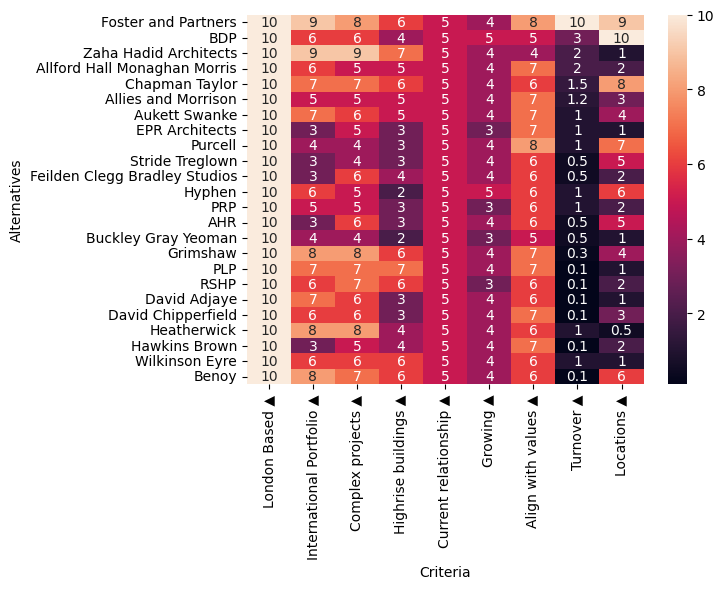

In [15]:
dm.plot()

## Adjust the sliders as per preference and view the Rankings

Adjust the sliders to create a decision matrix and view the results accordingly

In [22]:
@interact(a=criteria_slider(criteria_1[0]),
 b=criteria_slider(criteria_1[1]),
 c=criteria_slider(criteria_1[2]),
 d=criteria_slider(criteria_1[3]),
 e=criteria_slider(criteria_1[4]),
 f=criteria_slider(criteria_1[5]),
 g=criteria_slider(criteria_1[6]),
 h=criteria_slider(criteria_1[7]),
 i=criteria_slider(criteria_1[8]))

def g(a,b,c,d,e,f,g,h,i):
    
    dm = skc.mkdm(
    matrix,
    objectives,
    weights=[a/10,b/10,c/10,d/10,e/10,f/10,g/10,h/10,i/10],
    alternatives=["Foster and Partners","BDP","Zaha Hadid Architects","Allford Hall Monaghan Morris","Chapman Taylor","Allies and Morrison","Aukett Swanke","EPR Architects","Purcell","Stride Treglown","Feilden Clegg Bradley Studios","Hyphen", "PRP","AHR","Buckley Gray Yeoman","Grimshaw","PLP","RSHP","David Adjaye","David Chipperfield","Heatherwick","Hawkins Brown","Wilkinson Eyre","Benoy"],
    criteria= criteria_1
    )
    rank = pipe.evaluate(dm)
    Ranking_table =  pd.DataFrame({
    'Architects': rank.alternatives,
    'Rank': rank.rank_
    })
    sorted_ranks= Ranking_table.sort_values(by=['Rank'])

    return sorted_ranks

interactive(children=(IntSlider(value=5, continuous_update=False, description='London Based', max=10, style=Sl…